<a href="https://colab.research.google.com/github/chaudharygarima29/Machine_learning_projects/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("/content/iris_synthetic_data.csv")

In [3]:
x=data.iloc[:,0:4]

In [4]:
print(x)

      sepal length  sepal width  petal length  petal width
0              5.2          3.8           1.5          0.3
1              5.3          4.1           1.5          0.1
2              4.8          3.1           1.5          0.2
3              5.2          3.7           1.5          0.2
4              4.9          3.0           1.5          0.3
...            ...          ...           ...          ...
2995           7.2          3.6           6.0          2.5
2996           7.3          3.0           6.2          2.1
2997           6.9          3.2           5.7          2.3
2998           7.5          2.8           6.0          2.0
2999           6.7          3.0           5.3          2.3

[3000 rows x 4 columns]


In [5]:
y=data['label']

In [6]:
print(y)

0          Iris-setosa
1          Iris-setosa
2          Iris-setosa
3          Iris-setosa
4          Iris-setosa
             ...      
2995    Iris-virginica
2996    Iris-virginica
2997    Iris-virginica
2998    Iris-virginica
2999    Iris-virginica
Name: label, Length: 3000, dtype: object


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2)

In [9]:
X_train.shape

(2400, 4)

In [10]:
X_test.shape

(600, 4)

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
cfl=DecisionTreeClassifier(max_depth=4)

In [13]:
cfl.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=4)

In [14]:
Y_pred=cfl.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score

In [16]:
accuracy_score(Y_test,Y_pred)

0.975

In [17]:
from matplotlib.pylab import rcParams
from sklearn.tree import plot_tree

In [18]:
rcParams['figure.figsize']=80,50

[Text(0.34615384615384615, 0.9, 'x[2] <= 2.45\ngini = 0.667\nsamples = 2400\nvalue = [800, 797, 803]'),
 Text(0.2692307692307692, 0.7, 'gini = 0.0\nsamples = 800\nvalue = [800, 0, 0]'),
 Text(0.3076923076923077, 0.8, 'True  '),
 Text(0.4230769230769231, 0.7, 'x[3] <= 1.65\ngini = 0.5\nsamples = 1600\nvalue = [0.0, 797.0, 803.0]'),
 Text(0.3846153846153846, 0.8, '  False'),
 Text(0.15384615384615385, 0.5, 'x[2] <= 4.9\ngini = 0.068\nsamples = 792\nvalue = [0, 764, 28]'),
 Text(0.07692307692307693, 0.3, 'gini = 0.0\nsamples = 746\nvalue = [0, 746, 0]'),
 Text(0.23076923076923078, 0.3, 'x[2] <= 5.25\ngini = 0.476\nsamples = 46\nvalue = [0, 18, 28]'),
 Text(0.15384615384615385, 0.1, 'gini = 0.5\nsamples = 35\nvalue = [0, 18, 17]'),
 Text(0.3076923076923077, 0.1, 'gini = 0.0\nsamples = 11\nvalue = [0, 0, 11]'),
 Text(0.6923076923076923, 0.5, 'x[3] <= 1.75\ngini = 0.078\nsamples = 808\nvalue = [0, 33, 775]'),
 Text(0.5384615384615384, 0.3, 'x[1] <= 2.95\ngini = 0.473\nsamples = 73\nvalue = [

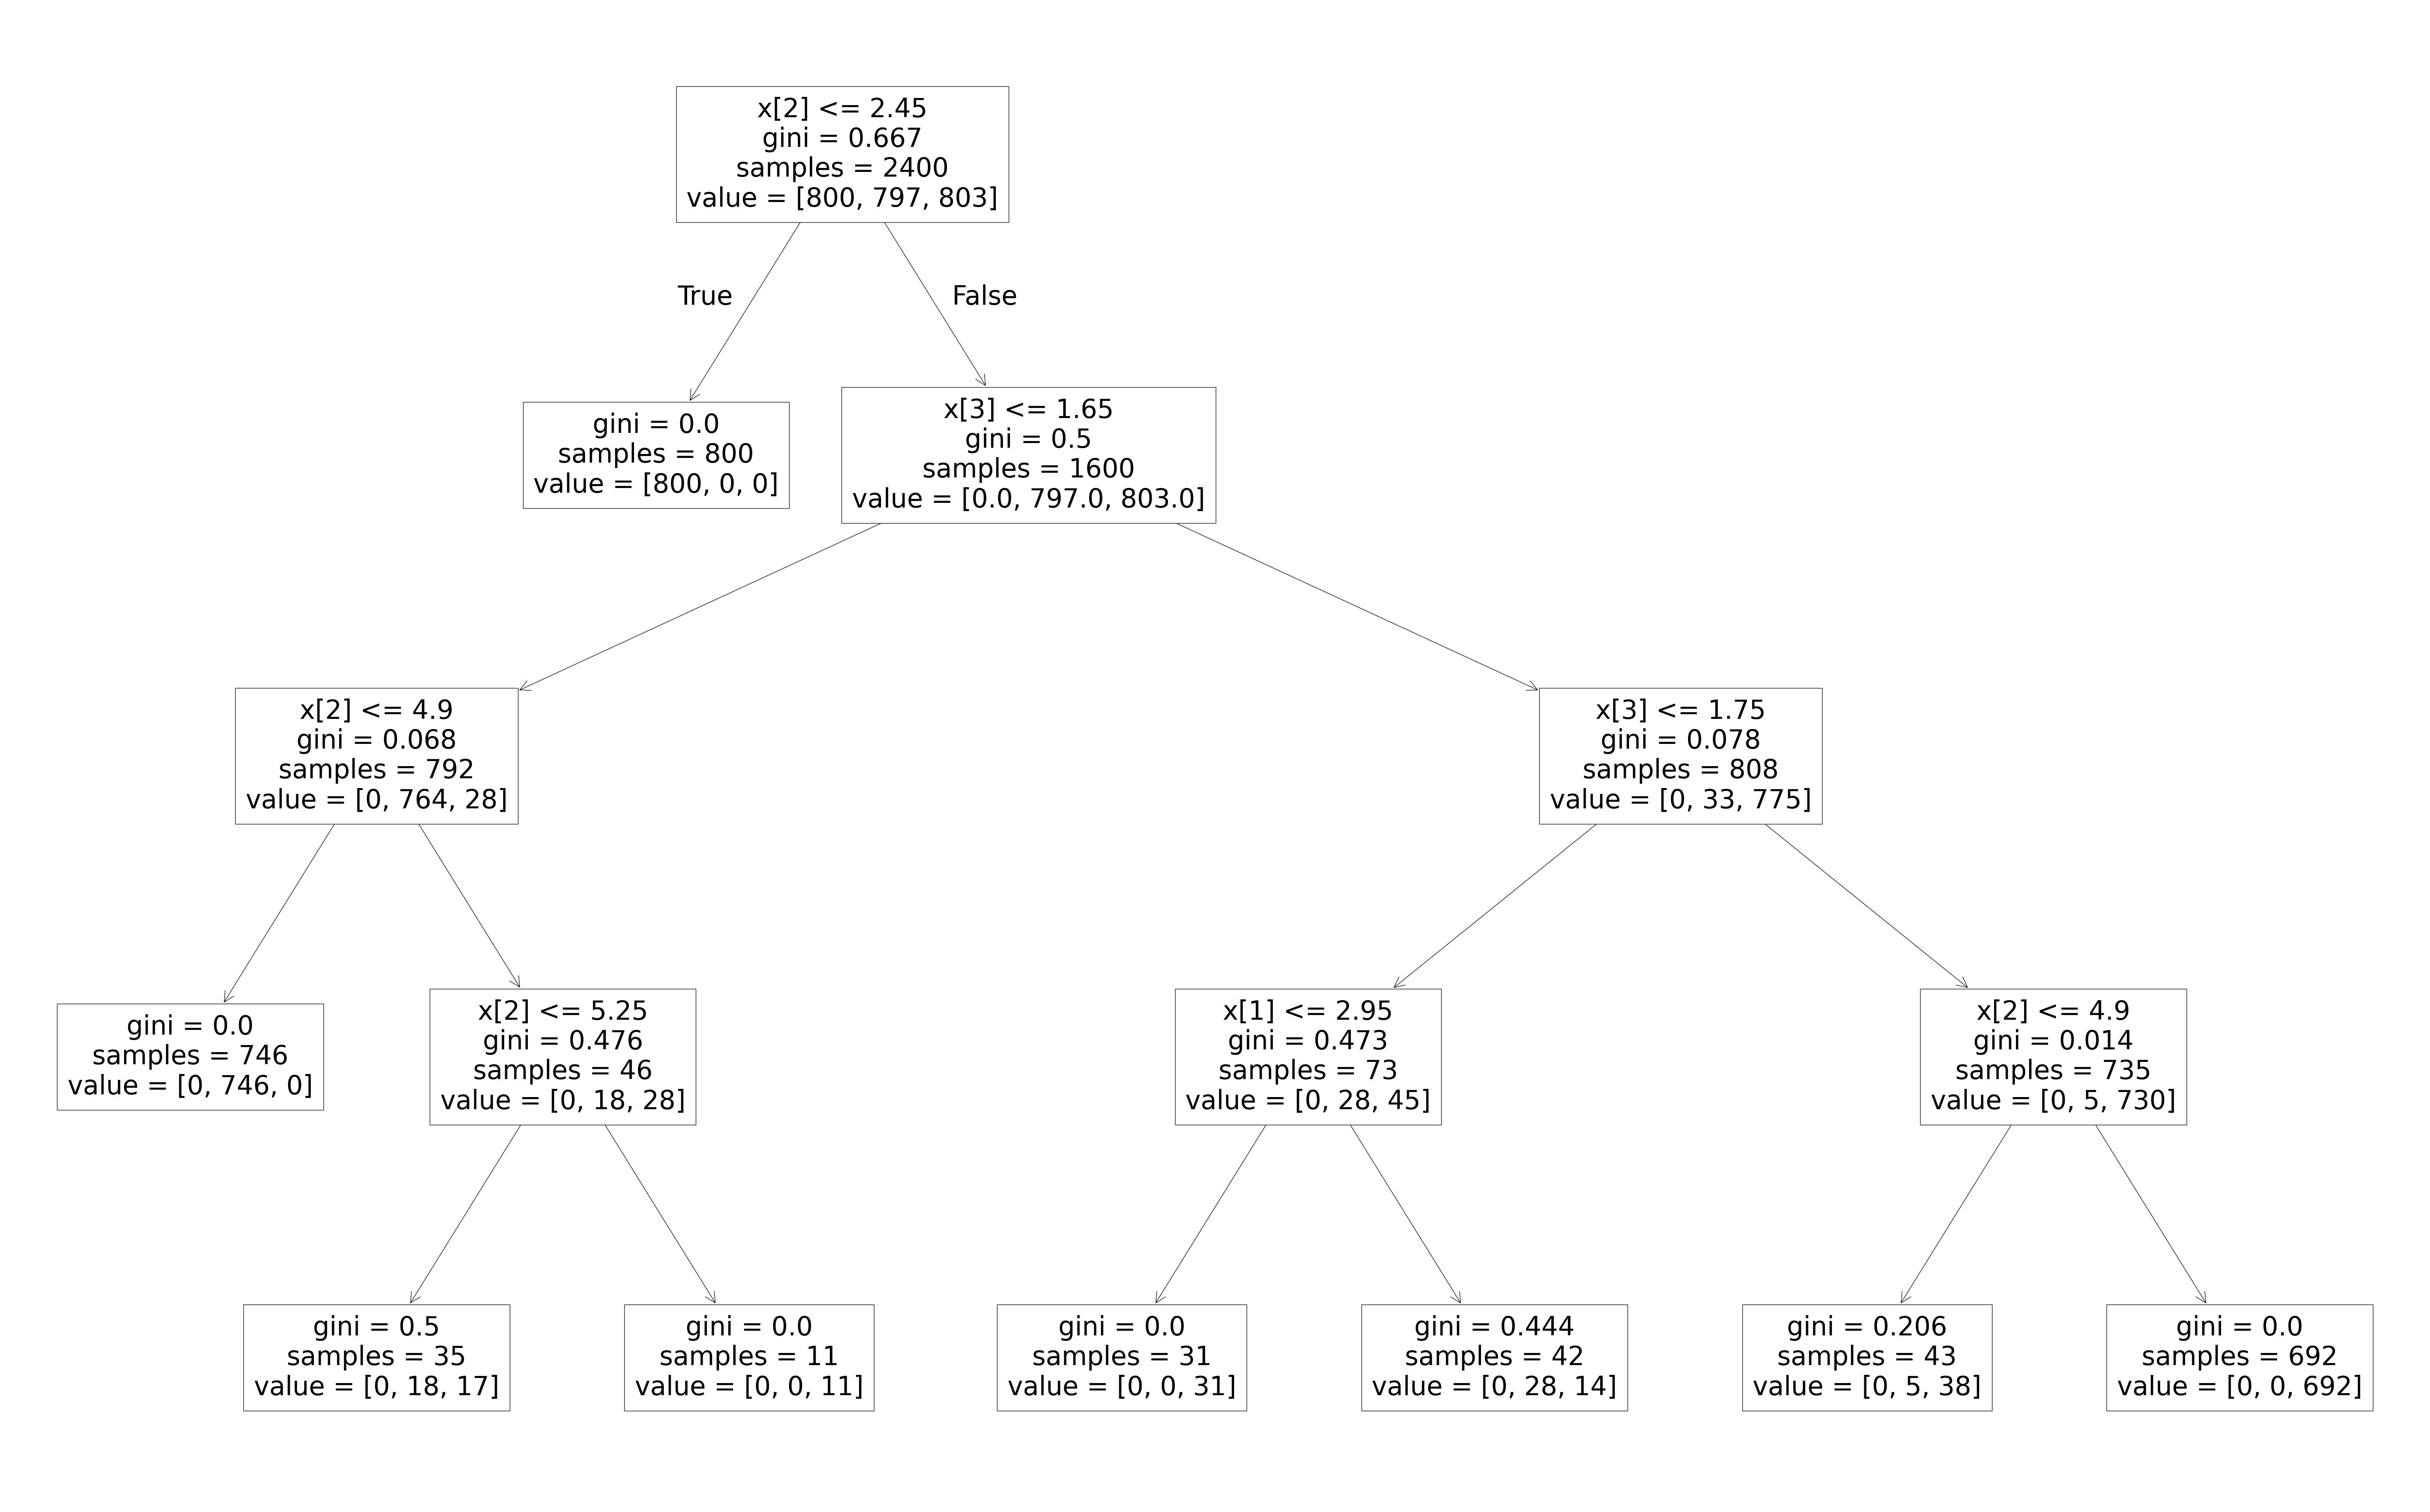

In [19]:
plot_tree(cfl)

In [20]:
param_dist={"criterion":['gini','entropy'],"max_depth":[1,2,3,4,5,6,7,8,None]}

In [21]:
from sklearn.model_selection import GridSearchCV

In [22]:
grid=GridSearchCV(cfl,param_grid=param_dist,cv=10,n_jobs=-1)

In [23]:
grid.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(max_depth=4), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, None]})

In [24]:
grid.best_estimator_

DecisionTreeClassifier()

In [25]:
grid.best_score_

np.float64(0.9991666666666668)

In [26]:
grid.best_params_

{'criterion': 'gini', 'max_depth': None}